In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Reading The Price Data
data = pd.read_csv('data/AMZN.csv', parse_dates = True, index_col = 'Date')

In [22]:
# Filtering The Columns
data = data.drop(columns = ['Adj Close'])
data

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200
...,...,...,...,...,...
2020-04-23,2399.979980,2424.219971,2382.080078,2399.449951,5066600
2020-04-24,2417.000000,2420.429932,2382.000000,2410.219971,3831800
2020-04-27,2443.199951,2444.879883,2363.000000,2376.000000,5645600


In [23]:
# Checking For NAN OR Missing Values
data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [24]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5777 entries, 1997-05-15 to 2020-04-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5777 non-null   float64
 1   High    5777 non-null   float64
 2   Low     5777 non-null   float64
 3   Close   5777 non-null   float64
 4   Volume  5777 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 270.8 KB


### Visualizing The Open & Close

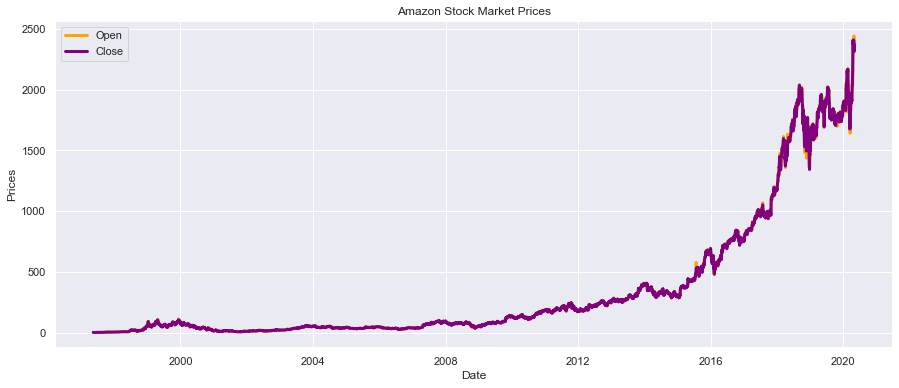

In [34]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15, 6))

plt.title('Amazon Stock Market Prices')
plt.ylabel('Prices')
plt.xlabel('Date')

plt.plot(data['Open'], linewidth=3, color = 'orange')
plt.plot(data['Close'], linewidth=3, color = 'purple')

plt.legend(['Open', 'Close'], loc = 'upper left')
plt.savefig('open_close_prices.png', dpi = 100)
plt.show()

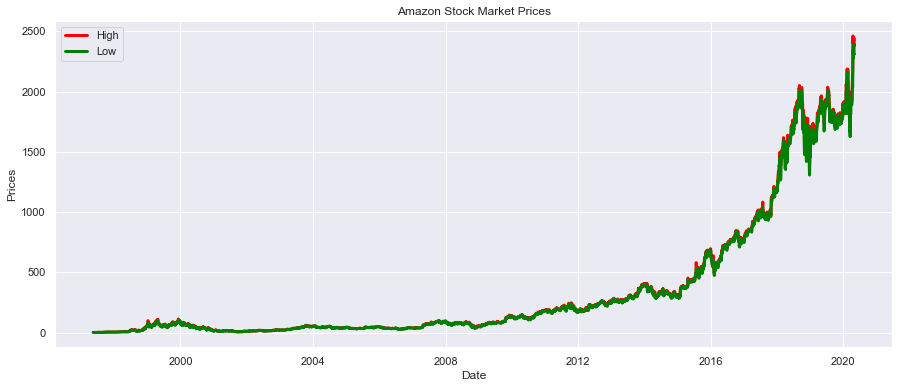

In [35]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15, 6))

plt.title('Amazon Stock Market Prices')
plt.ylabel('Prices')
plt.xlabel('Date')

plt.plot(data['High'], linewidth=3, color = 'red')
plt.plot(data['Low'], linewidth=3, color = 'green')

plt.legend(['High', 'Low'], loc = 'upper left')
plt.savefig('high_low_prices.png', dpi = 100)
plt.show()

In [43]:
# Get 80% Of Training Data Length
training_data_length = np.ceil(data.shape[0] * 0.8).astype('int')
training_data_length

4622

In [46]:
# Grabing The Training Data
training_data = data[:training_data_length]
training_data

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200
...,...,...,...,...,...
2015-09-21,544.330017,549.780029,539.590027,548.390015,3283300
2015-09-22,539.710022,543.549988,532.659973,538.400024,3841700
2015-09-23,538.299988,541.210022,534.000000,536.070007,2237600


In [49]:
# Normalizing The Training Data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_training_data

array([[1.78545539e-03, 1.81668601e-03, 1.14175861e-03, 1.02834732e-03,
        6.90171607e-01],
       [9.73884757e-04, 9.17336792e-04, 7.35369731e-04, 6.09392222e-04,
        1.36869475e-01],
       [6.13187276e-04, 5.57595722e-04, 5.80555539e-04, 5.71304066e-04,
        5.41168313e-02],
       ...,
       [9.29551337e-01, 9.32035083e-01, 9.89614972e-01, 9.77476894e-01,
        1.68563780e-02],
       [9.16133370e-01, 9.20552143e-01, 9.68937897e-01, 9.73235520e-01,
        2.90229387e-02],
       [9.36944238e-01, 9.34780559e-01, 9.66207018e-01, 9.55867876e-01,
        3.41268466e-02]])